In [1]:
%run Common.ipynb
import pandas as pd

In [2]:
import glob
basedir = 'data/ECE219_tweet_data/'

datafilenames = [i for i in glob.iglob(basedir + '*.txt')]
hashtags = [f.split('#')[1].replace('.txt','') for f in datafilenames]

<h1>Question 2</h1>

In [3]:
# load the extracted features
df_features = {}

for hashtag in log_progress(hashtags):
    tweet_features = pickle_load(basedir + 'tweets_#' + hashtag +'.txt.pkl.gz')
    df_features[hashtag] = pd.DataFrame(tweet_features)

In [4]:
df_features.keys()

dict_keys(['nfl', 'superbowl', 'sb49', 'patriots', 'gohawks', 'gopatriots'])

<h2>#superbowl</h2>

In [5]:
df_windowed_superbowl = pd.DataFrame(df_features['superbowl'].groupby(pd.Grouper(key='citetime_pst', freq="60Min")).fo_count.agg('count'))
df_windowed_superbowl.columns = ['num_tweets']
df_windowed_superbowl.fillna(value=0, inplace=True)

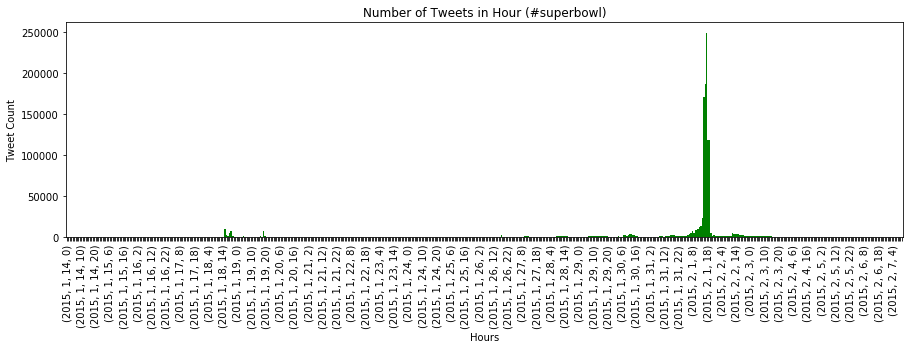

In [6]:
idx = df_windowed_superbowl.index
groupcols = [idx.year, idx.month, idx.day, idx.hour]

fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(3.95)
ax = df_windowed_superbowl.groupby(groupcols).num_tweets.sum().plot(ax=ax, kind="bar", color="green", width=1.0)
ax.set_title('Number of Tweets in Hour (#superbowl)')
ax.set_xlabel('Hours')
ax.set_ylabel('Tweet Count')

# hide some x labels so it look less cluttered
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % 10 != 0:
        label.set_visible(False)

<h2>#nfl</h2>

In [7]:
df_windowed_nfl = pd.DataFrame(df_features['nfl'].groupby(pd.Grouper(key='citetime_pst', freq="60Min")).fo_count.agg('count'))
df_windowed_nfl.columns = ['num_tweets']
df_windowed_nfl.fillna(value=0, inplace=True)

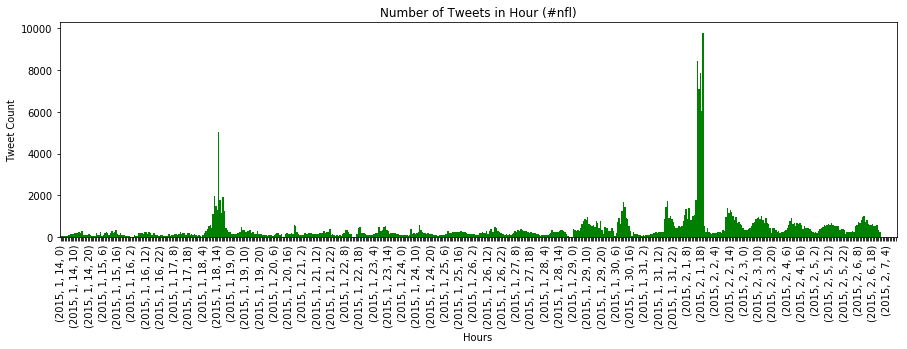

In [8]:
idx = df_windowed_nfl.index
groupcols = [idx.year, idx.month, idx.day, idx.hour]

fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(3.95)
ax = df_windowed_nfl.groupby(groupcols).num_tweets.sum().plot(ax=ax, kind="bar", color="green", width=1.0)
ax.set_title('Number of Tweets in Hour (#nfl)')
ax.set_xlabel('Hours')
ax.set_ylabel('Tweet Count')

# hide some x labels so it look less cluttered
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % 10 != 0:
        label.set_visible(False)
        
plt.show()